In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -------------------------
# IMPORTS
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# -------------------------
# EXTRACT
# -------------------------
df = pd.read_csv("/content/drive/My Drive/BI/consumer_behavior_and_shopping_habits.csv")

# -------------------------
# INITIAL EDA (PROFILING)
# -------------------------
print(df.head())
print(df.info())
print(df.describe(include="all"))

# Missing values
print("\nMissing values per column:\n", df.isna().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [ ]:
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (
    (df["Purchase Amount (USD)"] < Q1 - 1.5 * IQR) |
    (df["Purchase Amount (USD)"] > Q3 + 1.5 * IQR)
)

# Remove outliers
df = df[~outlier_mask]

In [ ]:
print("Inspecting categorical columns for consistency...")

categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) == 0:
    print("No categorical columns found in the DataFrame.")
else:
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_values}")

Inspecting categorical columns for consistency...

Column: Gender
Unique values: ['Male' 'Female']

Column: Item Purchased
Unique values: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Column: Category
Unique values: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Column: Location
Unique values: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'S

In [ ]:
# Mapping of full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply the mapping to the 'Location' column
df['Location'] = df['Location'].map(state_abbreviations)

print("Updated unique values in 'Location' column after abbreviation:")
print(df['Location'].unique())


Updated unique values in 'Location' column after abbreviation:
['KY' 'ME' 'MA' 'RI' 'OR' 'WY' 'MT' 'LA' 'WV' 'MO' 'AR' 'HI' 'DE' 'NH'
 'NY' 'AL' 'MS' 'NC' 'CA' 'OK' 'FL' 'TX' 'NV' 'KS' 'CO' 'ND' 'IL' 'IN'
 'AZ' 'AK' 'TN' 'OH' 'NJ' 'MD' 'VT' 'NM' 'SC' 'ID' 'PA' 'CT' 'UT' 'VA'
 'GA' 'NE' 'IA' 'SD' 'MN' 'WA' 'WI' 'MI']


In [ ]:
df_raw = pd.read_csv("/content/drive/My Drive/BI/consumer_behavior_and_shopping_habits.csv")
VALID_GENDERS = ['Male', 'Female']

audit = {
    "Raw rows": len(df_raw),
    "Rows after cleaning": len(df),
    "Duplicates removed": df_raw.duplicated().sum(),
    "Outliers removed": outlier_mask.sum(),
    "Missing values filled": df_raw.isna().sum().sum(),
    "Invalid genders removed":
        (~df_raw["Gender"].isin(VALID_GENDERS)).sum()
}

print(audit)

{'Raw rows': 3900, 'Rows after cleaning': 3900, 'Duplicates removed': np.int64(0), 'Outliers removed': np.int64(0), 'Missing values filled': np.int64(0), 'Invalid genders removed': np.int64(0)}


In [ ]:
top_10_items = df['Item Purchased'].value_counts().head(10)
print("Top 10 Most Purchased Items:")
print(top_10_items)


Top 10 Most Purchased Items:
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64


In [ ]:
df.to_csv("clean_consumer_data.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
consumption_df = pd.read_csv("clean_consumer_data.csv")
gdp_df = pd.read_csv("/content/drive/My Drive/BI/GDP_2023.csv")

print(consumption_df.head())
print(gdp_df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

  Location Size      Color  Season  Review Rating Subscription Status  \
0       KY    L       Gray  Winter            3.1                 Yes   
1       ME    L     Maroon  Winter            3.1                 Yes   
2       MA    S     Maroon  Spring            3.1                 Yes   
3       RI    M     Maroon  Spring            3.5                 Yes   
4       OR    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express   

In [ ]:
# Keep rows where name is not a region
exclude_terms = [
    "United States", "New England", "Mideast", "Great Lakes", "Plains",
    "Southeast", "Southwest", "Rocky Mountains", "Far West"
]

gdp_df = gdp_df[~gdp_df["State"].isin(exclude_terms)]


In [ ]:
state_abbreviations = {
    'ALABAMA':'AL','ALASKA':'AK','ARIZONA':'AZ','ARKANSAS':'AR','CALIFORNIA':'CA',
    'COLORADO':'CO','CONNECTICUT':'CT','DELAWARE':'DE','FLORIDA':'FL','GEORGIA':'GA',
    'HAWAII':'HI','IDAHO':'ID','ILLINOIS':'IL','INDIANA':'IN','IOWA':'IA',
    'KANSAS':'KS','KENTUCKY':'KY','LOUISIANA':'LA','MAINE':'ME','MARYLAND':'MD',
    'MASSACHUSETTS':'MA','MICHIGAN':'MI','MINNESOTA':'MN','MISSISSIPPI':'MS','MISSOURI':'MO',
    'MONTANA':'MT','NEBRASKA':'NE','NEVADA':'NV','NEW HAMPSHIRE':'NH','NEW JERSEY':'NJ',
    'NEW MEXICO':'NM','NEW YORK':'NY','NORTH CAROLINA':'NC','NORTH DAKOTA':'ND','OHIO':'OH',
    'OKLAHOMA':'OK','OREGON':'OR','PENNSYLVANIA':'PA','RHODE ISLAND':'RI','SOUTH CAROLINA':'SC',
    'SOUTH DAKOTA':'SD','TENNESSEE':'TN','TEXAS':'TX','UTAH':'UT','VERMONT':'VT',
    'VIRGINIA':'VA','WASHINGTON':'WA','WEST VIRGINIA':'WV','WISCONSIN':'WI','WYOMING':'WY',
    'DISTRICT OF COLUMBIA':'DC'
}

# Normalize case for mapping
gdp_df["State"] = gdp_df["State"].str.strip().str.upper()

gdp_df["State_Abbrev"] = gdp_df["State"].map(state_abbreviations)
# Remove any rows that are still not real states
gdp_df = gdp_df.dropna(subset=["State_Abbrev"])

print(gdp_df[['State','State_Abbrev','GDP-2023']].head())


           State State_Abbrev  GDP-2023
2    CONNECTICUT           CT    282478
3          MAINE           ME     73781
4  MASSACHUSETTS           MA    615148
5  NEW HAMPSHIRE           NH     91255
6   RHODE ISLAND           RI     63173


In [ ]:
print(consumption_df[['Location','Purchase Amount (USD)']].head())


  Location  Purchase Amount (USD)
0       KY                     53
1       ME                     64
2       MA                     73
3       RI                     90
4       OR                     49


In [ ]:
state_spending = (
    consumption_df
    .groupby("Location")["Purchase Amount (USD)"]
    .sum()
    .reset_index()
    .rename(columns={
        "Location": "State_Abbrev",
        "Purchase Amount (USD)": "Total_Consumption"
    })
)

print(state_spending.head())


  State_Abbrev  Total_Consumption
0           AK               4867
1           AL               5261
2           AR               4828
3           AZ               4326
4           CA               5605


In [ ]:
merged_df = pd.merge(
    state_spending,
    gdp_df[['State_Abbrev','GDP-2023']],
    on="State_Abbrev",
    how="inner"
)

print(merged_df.head())


  State_Abbrev  Total_Consumption  GDP-2023
0           AK               4867     53006
1           AL               5261    241753
2           AR               4828    140785
3           AZ               4326    414273
4           CA               5605   3233151


In [ ]:
corr = merged_df["GDP-2023"].corr(merged_df["Total_Consumption"])

print("Correlation between GDP and consumption:", round(corr,3))


Correlation between GDP and consumption: 0.203


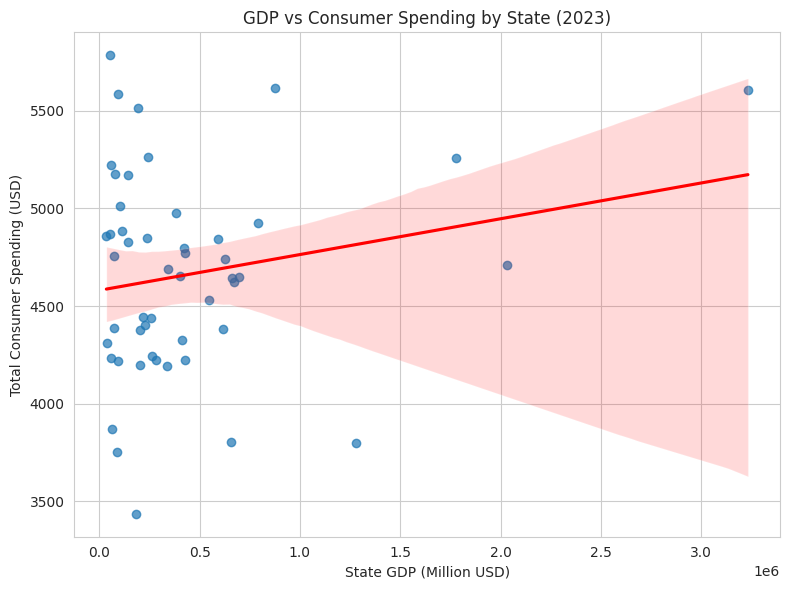

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.regplot(
    x="GDP-2023",
    y="Total_Consumption",
    data=merged_df,
    scatter_kws={"alpha":0.7},
    line_kws={"color":"red"}
)

plt.title("GDP vs Consumer Spending by State (2023)")
plt.xlabel("State GDP (Million USD)")
plt.ylabel("Total Consumer Spending (USD)")
plt.tight_layout()
plt.show()


In [ ]:
merged_df["GDP_norm"] = (
    (merged_df["GDP-2023"] - merged_df["GDP-2023"].min())
    / (merged_df["GDP-2023"].max() - merged_df["GDP-2023"].min())
)

merged_df["Cons_norm"] = (
    (merged_df["Total_Consumption"] - merged_df["Total_Consumption"].min())
    / (merged_df["Total_Consumption"].max() - merged_df["Total_Consumption"].min())
)

merged_df["Opportunity_Score"] = merged_df["GDP_norm"] + merged_df["Cons_norm"]

top_states = merged_df.sort_values(
    by="Opportunity_Score",
    ascending=False
).head(10)

print("\nTop candidate states for opening new stores:")
print(top_states[['State_Abbrev','GDP-2023','Total_Consumption','Opportunity_Score']])



Top candidate states for opening new stores:
   State_Abbrev  GDP-2023  Total_Consumption  Opportunity_Score
4            CA   3233151               5605           1.923732
33           NY   1775714               5257           1.319735
13           IL    875569               5617           1.191658
42           TX   2032933               4712           1.167953
25           MT     55193               5784           1.006291
12           ID     94914               5587           0.934775
32           NV    192216               5514           0.934096
37           PA    789502               4926           0.870328
1            AL    241753               5261           0.841789
28           NE    144183               5172           0.773359
